# Scrape the popularity of search terms from Google Trends

In [1]:
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
from dateutil import parser
import seaborn as sns
import time

In [2]:
query = 'lego'

url = 'https://trends.google.de/trends/explore?date=all&q={}'.format(query)

In [3]:
driver = webdriver.Firefox()
driver.get(url)
time.sleep(5)
html = driver.page_source
driver.close()

In [4]:
bs = BeautifulSoup(html, 'lxml')

data = []
for row in bs.find('div', {'aria-label':'A tabular representation of the data in the chart.'}).findAll('tr'):
    try:
        tds = row.findAll('td')
        data.append([parser.parse(tds[0].get_text()[1:-1], dayfirst=True), int(tds[1].get_text())])
    except:
        pass

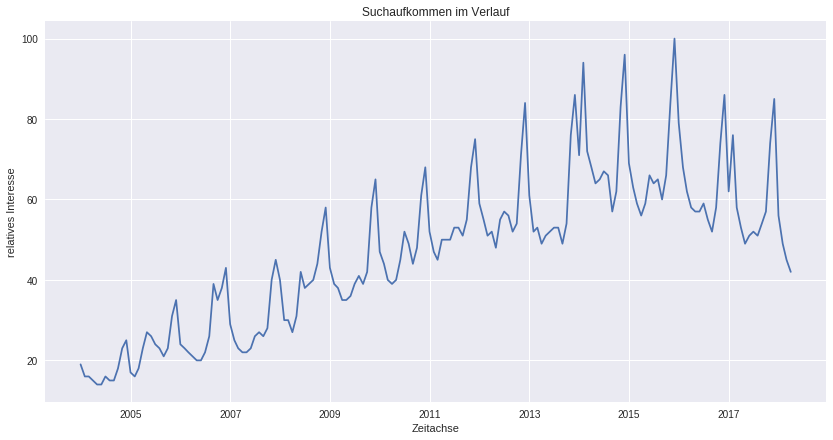

In [5]:
x, y = zip(*data)

plt.figure(figsize=(14,7))
plt.plot(x, y)
plt.title('Suchaufkommen im Verlauf')
plt.xlabel('Zeitachse')
plt.ylabel('relatives Interesse')
plt.show()